# 🔍 Model OCR

Este cuaderno tiene como objetivo principal explorar, implementar y evaluar un sistema de **Reconocimiento Óptico de Caracteres (OCR)** aplicado a imágenes de componentes de hardware de PC. A partir de un dataset previamente construido mediante scraping y limpieza de datos, se analizará la capacidad del OCR para extraer información textual relevante como marcas, modelos, códigos técnicos y otros identificadores impresos en los propios componentes.

Este cuaderno servirá como base experimental para validar la viabilidad del OCR en este dominio específico, así como para estudiar sus limitaciones en componentes que no contienen texto visible, sentando las bases para los futuros sistemas a implementar.


## Importaciones de paquetes

In [2]:
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
import easyocr


## Obtención de datos

**Fuente:** [components_03.csv](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/processed/components_03.csv)

Utilizaremos nuestro dataset resultante del web scraping de distintas páginas, ya procesado y listo para usar en nuestro modelo.

### Descripción de los datos

El dataset cuenta con  y **2 columnas**, de las cuales `label` es de tipo `int64` e `image` es de tipo `object`, ya que contiene la imagen vectorizada.

| Columna | Tipo   | Descripción                                        |
| ------- | ------ | -------------------------------------------------- |
| image   | object | Imagen vectorizada del componente de computadora   |
| label   | int64  | Etiqueta numérica que indica el tipo de componente |

El **target** que se busca predecir es el **label**, es decir, el tipo de componente.

| Número | Componente     |
| ------ | -------------- |
| 0      | motherboard    |
| 1      | gpu            |
| 2      | cpu            |
| 3      | hard_drive     |
| 4      | ram            |
| 5      | pc_case        |
| 6      | power_supply   |
| 7      | liquid_cooling |
| 8      | case_fan       |
| 9      | cpu_fan        |
| 10     | sound_card     |


In [3]:
df = pd.read_csv("../data/processed/components_03.csv")

In [4]:
df.info()
df

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   local_image_path  9971 non-null   str  
 1   label             9971 non-null   int64
dtypes: int64(1), str(1)
memory usage: 155.9 KB


,local_image_path,label
0,../data/images/motherboard_0.jpg,0
1,../data/images/motherboard_1.jpg,0
2,../data/images/motherboard_2.jpg,0
3,../data/images/motherboard_3.jpg,0
4,../data/images/motherboard_4.jpg,0
...,...,...
9966,../data/images/hard_drive_9977.jpg,3
9967,../data/images/hard_drive_9978.jpg,3
9968,../data/images/hard_drive_9979.jpg,3
9969,../data/images/hard_drive_9980.jpg,3


In [6]:
label_map = {
    0: 'motherboard',
    1: 'gpu',
    2: 'cpu',
    3: 'hard_drive',
    4: 'ram',
    5: 'pc_case',
    6: 'power_supply',
    7: 'liquid_cooling',
    8: 'case_fan',
    9: 'cpu_fan',
    10: 'sound_card'
}

## Procesamiento de imágenes

En esta sección se aplica el OCR a todas las imágenes del dataset para extraer el texto visible en los componentes de PC. 
Se procesan las imágenes una a una y se almacenan los resultados en un nuevo CSV con el texto detectado.

In [5]:
reader = easyocr.Reader(['en'], gpu=True)

ocr_texts = []
ocr_confidences = []
ocr_blocks = []

for img_path in tqdm(df["local_image_path"]):
    try:
        img = cv2.imread(img_path)
        if img is None:
            ocr_texts.append("")
            ocr_confidences.append(0)
            ocr_blocks.append(0)
            continue

        results = reader.readtext(img)

        texts = [text for _, text, _ in results]
        confidences = [conf for _, _, conf in results]

        ocr_texts.append(" | ".join(texts))
        ocr_confidences.append(sum(confidences) / len(confidences) if confidences else 0)
        ocr_blocks.append(len(texts))

    except Exception as e:
        ocr_texts.append("")
        ocr_confidences.append(0)
        ocr_blocks.append(0)

df["ocr_text"] = ocr_texts
df["ocr_avg_confidence"] = ocr_confidences
df["ocr_num_blocks"] = ocr_blocks

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
  0%|          | 0/9971 [00:00<?, ?it/s]c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)
100%|██████████| 9971/9971 [1:53:08<00:00,  1.47it/s]  


In [8]:
df.to_csv('../data/processed/components_04.csv', index=False)

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   local_image_path    9971 non-null   str    
 1   label               9971 non-null   int64  
 2   ocr_text            9971 non-null   str    
 3   ocr_avg_confidence  9971 non-null   float64
 4   ocr_num_blocks      9971 non-null   int64  
dtypes: float64(1), int64(2), str(2)
memory usage: 389.6 KB


In [10]:
df

,local_image_path,label,ocr_text,ocr_avg_confidence,ocr_num_blocks
0,../data/images/motherboard_0.jpg,0,BGsdM | PRD-VDH | Hadi | B5SC | msi | m5i,0.242091,6
1,../data/images/motherboard_1.jpg,0,8850 Grming plus | 8501,0.455908,2
2,../data/images/motherboard_2.jpg,0,5 | 1 | 2 | 1 | BzG0M | ds3h @DRk | GIGABYTE |...,0.299432,9
3,../data/images/motherboard_3.jpg,0,64MB | R24@7 FOR | BlOS | 7ii: (F | 0aG | bosi...,0.438131,9
4,../data/images/motherboard_4.jpg,0,PRIME | BSSOM-A | II | 3 | 4,0.456415,5
...,...,...,...,...,...
9966,../data/images/hard_drive_9977.jpg,3,"AdBUD"" 9n7a Ie | WD | BLacK | Wcatcin Diclal",0.141853,4
9967,../data/images/hard_drive_9978.jpg,3,ner-aln | s0oG8 | NvZii | 68K@ ZEcnvn :,0.094094,4
9968,../data/images/hard_drive_9979.jpg,3,crucial | T500 | KneMis',0.635752,3
9969,../data/images/hard_drive_9980.jpg,3,"Jnicron | P31O | crucial | PCIo"" Gtna NVMe"" M2...",0.627579,4


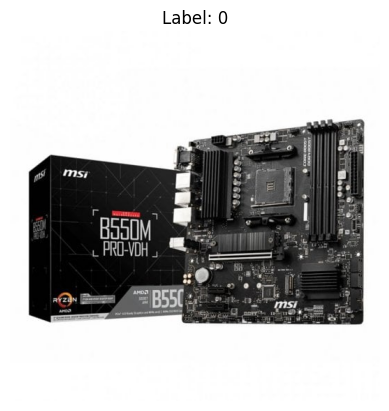

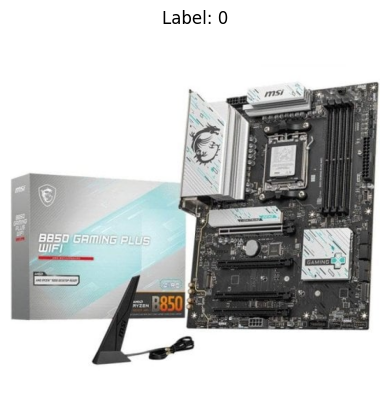

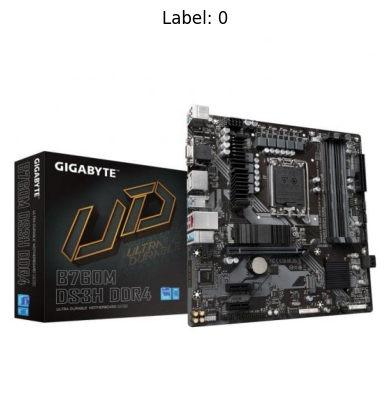

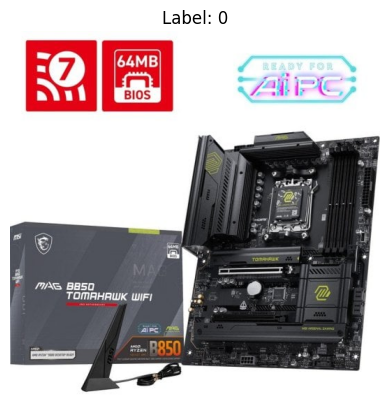

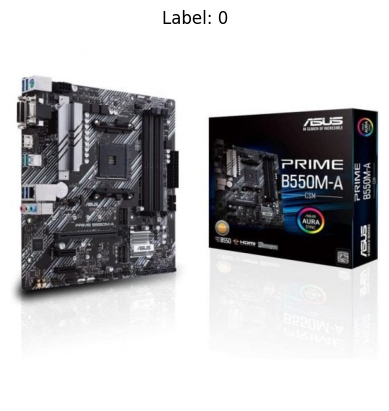

In [15]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


# Mostrar primeras 5 imágenes con sus labels
for idx, row in df.head(5).iterrows():
    img = Image.open(row['local_image_path'])
    plt.imshow(img)
    plt.title(f"Label: {row['label']}")
    plt.axis('off')
    plt.show()


In [16]:
import easyocr

reader = easyocr.Reader(['en'], gpu=False)  # Usa CPU por ahora

# Probar las primeras 5 imágenes
for idx, row in df.head(5).iterrows():
    results = reader.readtext(row['local_image_path'])
    print(f"\nImagen {idx} ({row['label']}):")
    for bbox, text, conf in results:
        print(f" - {text} ({conf:.2f})")


Using CPU. Note: This module is much faster with a GPU.
c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)



Imagen 0 (0):
 - BGSdM (0.17)
 - PRD-VDH (0.29)
 - Hadi (0.09)
 - B5SC (0.34)
 - msi (0.18)
 - m5i (0.25)


c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)



Imagen 1 (0):
 - 8050 Grmins plus (0.20)
 - 18501 (0.51)


c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)



Imagen 2 (0):
 - 5 (0.10)
 - 1 (0.26)
 - 2 (0.67)
 - 1 (0.05)
 - BzG0M (0.28)
 - ds3h @DRL (0.08)
 - GIGABYTE (0.99)
 - 11 (0.13)
 - ULTTI (0.02)


c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)



Imagen 3 (0):
 - 64MB (0.71)
 - R24@% FOR (0.32)
 - BlOS (0.61)
 - 7ii: ( (0.36)
 - 0aG (0.16)
 - bosihaWk (0.39)
 - WifI (0.54)
 - 850' (0.72)
 - Kamlde (0.00)

Imagen 4 (0):
 - 25 (0.16)
 - PRIME (0.94)
 - BSSOM-A (0.92)
 - II (0.12)
 - 3 (0.19)


c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)


In [17]:
text_counts = []

for idx, row in df.head(100).iterrows():  # prueba con 100 imágenes primero
    results = reader.readtext(row['local_image_path'])
    text_counts.append(len(results))

print(f"Promedio de bloques de texto por imagen: {sum(text_counts)/len(text_counts):.2f}")


c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)
c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)
c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)
c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)
c:\Users\abarr\Documents

Promedio de bloques de texto por imagen: 5.58


c:\Users\abarr\Documents\HardVisionAI\venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)
